# EXPLORATORY DATA ANALYSIS (I.)

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)


In [2]:
data2016 = pd.read_csv('../../DATA/FINAL/training_data_2016.csv')
data2017 = pd.read_csv('../../DATA/FINAL/training_data_2017.csv')
data2018 = pd.read_csv('../../DATA/FINAL/training_data_2018.csv')

In [3]:
def get_sample_sizes(data, row_label, column_label):
    samples_df = data.groupby([row_label, column_label])['financial_statement_id'].nunique().to_frame('count').reset_index()
    wide_df = pd.pivot_table(samples_df, index = row_label, columns=column_label, fill_value=0)
    return wide_df

In [55]:
subset = data2016.query('period_length == 12 and sal_class in ["2. Malý",  "3. Stredný"] and financial_report_template_id == 699 and is_outlier == False')
subset['negative_equity'] = subset['EQ'] < 0
subset['negative_eat'] = subset['EAT'] < 0
subset['low_l3'] = subset['L3'] < 1
subset['low_eq_tl'] = subset['EQ_TL'] < 0.08


pd.concat([
    subset.groupby(['low_l3', 'negative_equity', 'low_eq_tl', 'negative_eat'])['RU_konkurz_3y_off'].sum().to_frame('konkurz'),
    subset.groupby(['low_l3', 'negative_equity', 'low_eq_tl', 'negative_eat'])['RUZ_cancelled_3y_off'].sum().to_frame('zrusena'),
    subset.groupby(['low_l3', 'negative_equity', 'low_eq_tl', 'negative_eat'])['entity_id'].nunique().to_frame('total')], axis=1).reset_index()


#  'DPHZ_vat_registration_cancelled_2y_off',
#  'RUZ_cancelled_2y_off',
#  'RUZ_indirect_criterion_2y_off',
#  'RU_konkurz_2y_off',
#  'RU_ostatne_konania_2y_off',
#  'direct_criterion_2y_off'

C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_9488\282445946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['negative_equity'] = subset['EQ'] < 0
C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_9488\282445946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['negative_eat'] = subset['EAT'] < 0
C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_9488\282445946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,low_l3,negative_equity,low_eq_tl,negative_eat,konkurz,zrusena,total
0,False,False,False,False,25.0,81,4656
1,False,False,False,True,10.0,19,514
2,False,False,True,False,4.0,25,393
3,False,False,True,True,3.0,4,119
4,False,True,False,True,0.0,0,1
5,False,True,True,False,1.0,1,50
6,False,True,True,True,4.0,4,72
7,True,False,False,False,9.0,10,852
8,True,False,False,True,5.0,3,183
9,True,False,True,False,4.0,12,266


In [14]:
list(subset.columns)

['financial_report_id',
 'financial_statement_id',
 'financial_report_order_number',
 'entity_id',
 'approved_date',
 'entity_ico',
 'year',
 'month',
 'financial_report_template_id',
 'entity_name',
 'establishment_date',
 'cancellation_date',
 'sknace_code',
 'entity_state',
 'period_length',
 'financial_report_id.1',
 'financial_report_template_id.1',
 'total_assets',
 'non_current_assets',
 'intangible_assets',
 'total_non_current_tangible_assets',
 'land_and_buildings',
 'separate_movable_assets_and_sets_of_movable_assets',
 'other_long_term_tangible_assets',
 'adjustment_item_for_acquired_assets',
 'total_long_term_financial_assets',
 'bank_balances_with_maturity_longer_than_one_year',
 'current_assets',
 'inventories',
 'non_current_claims',
 'current_claims',
 'trade_receivables',
 'social_security_tax_receivables_and_grants',
 'financial_assets',
 'other_financial_accounts',
 'cash_and_bank_balances',
 'total_owners_equity_and_liabilities',
 'owners_equity',
 'share_capital',


In [28]:
subset.query('RUZ_indirect_criterion_1y_off == 1')[['entity_ico', 'year', 'owners_equity', 
 'DPHZ_vat_registration_cancelled_3y_off',
 'RUZ_indirect_criterion_3y_off',
 'RU_konkurz_3y_off',
 'RU_ostatne_konania_3y_off',
 'RUZ_cancelled_3y_off']]

,entity_ico,year,owners_equity,DPHZ_vat_registration_cancelled_3y_off,RUZ_indirect_criterion_3y_off,RU_konkurz_3y_off,RU_ostatne_konania_3y_off,RUZ_cancelled_3y_off
10,152781.0,2017,618267.0,0.0,1.0,0.0,0.0,0
1090,17334128.0,2017,95504.0,0.0,1.0,0.0,0.0,0
1721,31320121.0,2017,-1264552.0,0.0,1.0,0.0,0.0,1
1821,31323570.0,2017,-3661531.0,0.0,1.0,0.0,0.0,0
1932,31327931.0,2017,44347.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
178765,50443003.0,2017,-70740.0,0.0,1.0,0.0,0.0,0
178861,50446592.0,2017,18882.0,0.0,1.0,0.0,0.0,0
178997,50450891.0,2017,-74909.0,0.0,1.0,0.0,0.0,0
186339,50697251.0,2017,-8801.0,0.0,1.0,0.0,0.0,0


In [3]:
predictors = [
    'L3',
    'L2',
    'L1',
    'CF_CL',
    'CASH_TA',
    'SAL_TA',
    'TL_SAL',
    'INV_COST',
    'INV_SAL',
    'CC_SAL',
    'TA_SAL',
    'TL_TA',
    'CF_TL',
    'CL_TA',
    'NCL_TA',
    'EQ_TL',
    'EQ_TA',
    'CL_CC',
    'ROE',
    'EAT_TA',
    'ROA_BRUTTO',
    'CF_TA',
    'CF_SAL',
    'ROS',
    'EAT_YIE',
    'ROI',
    'ROA_NETTO',
    'LABOR_PRODUCTIVITY',
    'SOCLIAB_SAL']

print(len(predictors))

29


In [4]:
predictors_previous = [col + '_previous' for col in predictors]
predictors_yty = [col + '_yty' for col in predictors]

predictors_extended = predictors + predictors_previous + predictors_yty
predictors_2y_abs = predictors + predictors_previous
predictors_2y_rel = predictors + predictors_yty

In [5]:

issues_list = [
 'DPHZ_vat_registration_cancelled',
 'RUZ_cancelled',
 'RUZ_indirect_criterion',
 'RU_konkurz',
 'RU_ostatne_konania',
 'direct_criterion'
]
issues_1y_off_list = [
 'DPHZ_vat_registration_cancelled_1y_off',
 'RUZ_cancelled_1y_off',
 'RUZ_indirect_criterion_1y_off',
 'RU_konkurz_1y_off',
 'RU_ostatne_konania_1y_off',
 'direct_criterion_1y_off'
]

issues_2y_off_list = [
 'DPHZ_vat_registration_cancelled_2y_off',
 'RUZ_cancelled_2y_off',
 'RUZ_indirect_criterion_2y_off',
 'RU_konkurz_2y_off',
 'RU_ostatne_konania_2y_off',
 'direct_criterion_2y_off'
]

In [6]:
display(training_data_raw['period_length'].value_counts().head(5))
training_data = training_data_raw.query('period_length == 12')
training_data.drop(columns=['period_length'], inplace=True)

display(testing_data_raw['period_length'].value_counts().head(5))
testing_data = testing_data_raw.query('period_length == 12')
testing_data.drop(columns=['period_length'], inplace=True)

12    189369
10      1499
7       1352
8       1233
11      1205
Name: period_length, dtype: int64

c:\Users\matus.rohal\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


12    203120
10      1326
7       1300
8       1221
9       1159
Name: period_length, dtype: int64

In [7]:
display(training_data['sal_class'].value_counts().head(5))
training_data.query('sal_class in ["2. Malý",  "3. Stredný"]', inplace=True)

display(testing_data['sal_class'].value_counts().head(5))
testing_data.query('sal_class in ["2. Malý",  "3. Stredný"]', inplace=True)

0. <50,000    102555
1. Mikro       78010
2. Malý         6703
3. Stredný      1704
4. Veľký         397
Name: sal_class, dtype: int64

C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_8844\486968367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.query('sal_class in ["2. Malý",  "3. Stredný"]', inplace=True)


0. <50,000    110509
1. Mikro       83263
2. Malý         7086
3. Stredný      1851
4. Veľký         411
Name: sal_class, dtype: int64

C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_8844\486968367.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data.query('sal_class in ["2. Malý",  "3. Stredný"]', inplace=True)


In [8]:
display(training_data['financial_report_template_id'].value_counts().head(5))
training_data.query('financial_report_template_id == 699', inplace=True)
training_data.drop(columns=['financial_report_template_id', 'financial_report_id.1', 'financial_report_template_id.1'], inplace=True)

display(testing_data['financial_report_template_id'].value_counts().head(5))
testing_data.query('financial_report_template_id == 699', inplace=True)
testing_data.drop(columns=['financial_report_template_id', 'financial_report_id.1', 'financial_report_template_id.1'], inplace=True)

699.0    8031
687.0     376
Name: financial_report_template_id, dtype: int64

C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_8844\4256089872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.query('financial_report_template_id == 699', inplace=True)


699.0    8444
687.0     493
Name: financial_report_template_id, dtype: int64

C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_8844\4256089872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data.query('financial_report_template_id == 699', inplace=True)


In [9]:
display(training_data['is_outlier'].value_counts().head(5))
training_data.query('is_outlier == False', inplace= True)
training_data.drop(columns=['is_outlier'], inplace=True)

display(testing_data['is_outlier'].value_counts().head(5))
testing_data.query('is_outlier == False', inplace= True)
testing_data.drop(columns=['is_outlier'], inplace=True)

False    7944
True       87
Name: is_outlier, dtype: int64

C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_8844\2066644919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.query('is_outlier == False', inplace= True)


False    8364
True       80
Name: is_outlier, dtype: int64

C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_8844\2066644919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data.query('is_outlier == False', inplace= True)


In [10]:
def get_sample_sizes(data, row_label, column_label):
    samples_df = data.groupby(row_label + column_label)['financial_statement_id'].nunique().to_frame('count').reset_index()
    wide_df = pd.pivot_table(samples_df, index = row_label, columns=column_label, fill_value=0)
    return wide_df

In [11]:
get_sample_sizes(training_data, ['sknace_division'], ['sal_class'])

count           
sal_class       2. Malý 3. Stredný
sknace_division                   
A                   186         20
B                    21          6
C                  1253        498
D                    81         30
E                    68         16
F                   549         87
G                  2064        554
H                   478        117
I                   117          7
J                   225         54
K                    26         15
L                   240         52
M                   461         74
N                   358         62
O                     3          0
P                    17          0
Q                    77         38
R                    47         23
S                    18          2

In [12]:
counts_table = get_sample_sizes(training_data, ['sal_class', 'sknace_division'], ['RUZ_indirect_criterion_2y_off']).reset_index()
counts_table.columns = ['sal_class', 'sknace_division', 'healthy', 'distressed']
counts_table['total'] = counts_table['healthy'] + counts_table['distressed']
counts_table['distressed_ratio'] = 100 * counts_table['distressed'] / counts_table['total']

display(counts_table.sort_values('total', ascending=False).head(100))

sknace_groups = ['G', 'C', 'F', 'H', 'M', 'N', 'L']

# G - VEĽKOOBCHOD A MALOOBCHOD OPRAVA MOTOROVÝCH VOZIDIEL A MOTOCYKLOV
# C - Priemyselná výroba
# F - STAVEBNÍCTVO
# H - DOPRAVA A SKLADOVANIE
# M - ODBORNÉ VEDECKÉ A TECHNICKÉ ČINNOSTI
# N - ADMINISTRATÍVNE A PODPORNÉ SLUŽBY
# L - ČINNOSTI V OBLASTI NEHNUTEĽNOSTÍ

,sal_class,sknace_division,healthy,distressed,total,distressed_ratio
6,2. Malý,G,1945,119,2064,5.765504
2,2. Malý,C,1187,66,1253,5.267358
25,3. Stredný,G,538,16,554,2.888087
5,2. Malý,F,522,27,549,4.918033
21,3. Stredný,C,474,24,498,4.819277
7,2. Malý,H,438,40,478,8.368201
12,2. Malý,M,436,25,461,5.422993
13,2. Malý,N,335,23,358,6.424581
11,2. Malý,L,228,12,240,5.000000
9,2. Malý,J,216,9,225,4.000000


In [13]:
# financial_ratios_table_raw = financial_ratios_table_raw.query('entity_ico in @master_set')
# financial_ratios_table_raw

In [14]:
SAL_CLASSES = sorted(training_data['sal_class'].unique())
# SKNACE_GROUPS = data_2017['sknace_division'].unique()
SKNACE_GROUPS = ['G', 'C', 'F', 'H', 'M', 'N', 'L']

In [15]:
from sklearn.impute import SimpleImputer


def fill_missing_values_mean(data):
    # Instantiate SimpleImputer with mean strategy
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on the data and transform the data
    imputed_data = imputer.fit_transform(data)

    return imputed_data

training_data_filled = pd.DataFrame()
testing_data_filled = pd.DataFrame()

for sal_class in SAL_CLASSES:
    for sknace in SKNACE_GROUPS:
        # print(f'sales_class: {sal_class}; sknace: {sknace}')
        subset_training = training_data.query('sal_class == @sal_class and sknace_division == @sknace')
        subset_testing = testing_data.query('sal_class == @sal_class and sknace_division == @sknace')
        for col in predictors_extended:
            col_mean = subset_training[col].mean()
            subset_training[col] = subset_training[col].fillna(col_mean)
            
            col_mean = subset_testing[col].mean()
            subset_testing[col] = subset_testing[col].fillna(col_mean)
            

        training_data_filled = pd.concat([training_data_filled, subset_training], axis = 0)
        testing_data_filled = pd.concat([testing_data_filled, subset_testing], axis = 0)

display(training_data_filled.shape[0])


C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_8844\861245203.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_training[col] = subset_training[col].fillna(col_mean)
C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_8844\861245203.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_testing[col] = subset_testing[col].fillna(col_mean)


6847

In [31]:
issues_2y_off_list

['DPHZ_vat_registration_cancelled_2y_off',
 'RUZ_cancelled_2y_off',
 'RUZ_indirect_criterion_2y_off',
 'RU_konkurz_2y_off',
 'RU_ostatne_konania_2y_off',
 'direct_criterion_2y_off']

In [57]:
bancrupted_count = training_data_filled.query('RUZ_indirect_criterion_2y_off == 1').shape[0]

training_data_randomly_balanced = pd.concat(
    [
        training_data_filled.query('RUZ_indirect_criterion_2y_off == 1'),
        training_data_filled.query('RUZ_indirect_criterion_2y_off == 0').sample(bancrupted_count)
        ], axis = 0)

training_data_randomly_balanced

,financial_report_id,financial_statement_id,financial_report_order_number,entity_id,approved_date,entity_ico,year,month,entity_name,establishment_date,cancellation_date,sknace_code,entity_state,total_assets,non_current_assets,intangible_assets,total_non_current_tangible_assets,land_and_buildings,separate_movable_assets_and_sets_of_movable_assets,other_long_term_tangible_assets,adjustment_item_for_acquired_assets,total_long_term_financial_assets,bank_balances_with_maturity_longer_than_one_year,current_assets,inventories,non_current_claims,current_claims,trade_receivables,social_security_tax_receivables_and_grants,financial_assets,other_financial_accounts,cash_and_bank_balances,total_owners_equity_and_liabilities,owners_equity,share_capital,share_capital_and_changes_in_share_capital,claims_for_subscribed_owners_equity,capital_funds,valuation_differences,undivided_profit_or_unpaid_loss_from_previous_years,profit_for_the_reporting_period_after_tax,liabilities,long_term_liabilities_excluding_reserves_and_loans,long_term_reserves,long_term_bank_loans,total_short_term_liabilities_excluding_reserves_loans_and_advances,short_term_trade_liabilities,liabilities_to_employees_and_social_insurance,tax_liabilities_and_grants,short_term_reserves,...,CC_SAL_previous,TA_SAL_previous,TL_TA_previous,CF_TL_previous,CL_TA_previous,NCL_TA_previous,EQ_TL_previous,EQ_TA_previous,CL_CC_previous,ROE_previous,EAT_TA_previous,ROA_BRUTTO_previous,CF_TA_previous,CF_SAL_previous,ROS_previous,EAT_YIE_previous,ROI_previous,ROA_NETTO_previous,LABOR_PRODUCTIVITY_previous,SOCLIAB_SAL_previous,L3_yty,L2_yty,L1_yty,CF_CL_yty,CASH_TA_yty,SAL_TA_yty,TL_SAL_yty,INV_COST_yty,INV_SAL_yty,CC_SAL_yty,TA_SAL_yty,TL_TA_yty,CF_TL_yty,CL_TA_yty,NCL_TA_yty,EQ_TL_yty,EQ_TA_yty,CL_CC_yty,ROE_yty,EAT_TA_yty,ROA_BRUTTO_yty,CF_TA_yty,CF_SAL_yty,ROS_yty,EAT_YIE_yty,ROI_yty,ROA_NETTO_yty,LABOR_PRODUCTIVITY_yty,SOCLIAB_SAL_yty,has_3y_history
1090,6106404,3547398,1,287075,2018-12-10,17334128.0,2017,1,Wolf Slovenská republika s. r. o.,1991-11-08,NaN,46740.0,NaN,1032297.0,29768.0,0.0,29768.0,0.0,29768.0,0.0,0.0,0.0,0.0,981972.0,30332.0,36307.0,719463.0,718611.0,296.0,195870.0,0.0,195870.0,1032297.0,95504.0,16930.0,16930.0,0.0,1693.0,113319.0,113319.0,-36438.0,936601.0,274.0,0.0,0.0,903831.0,748072.0,44877.0,93946.0,32496.0,...,0.181351,114.579607,0.881219,0.119154,0.840232,0.040987,0.134792,0.118781,1.474633,0.227297,0.026999,0.071404,0.105001,0.033419,0.008593,0.008242,0.033552,0.026999,0.160250,0.013226,0.013398,0.014217,-0.323614,-0.614684,-0.295180,0.020582,0.008830,-0.003765,0.010088,0.198506,-0.020167,0.029594,-0.610027,0.042037,-0.225487,-0.243510,-0.221122,-0.148088,-2.678570,-2.307401,-0.911790,-0.598486,-0.606583,-2.281034,-2.289171,-1.989980,-2.307401,0.023420,0.025062,1.0
1721,6312964,3714543,1,433708,NaN,31320121.0,2017,1,Herlitz Slovakia s.r.o.,1992-03-20,2020-12-03,46490.0,NaN,1564401.0,8369.0,0.0,8369.0,0.0,8369.0,0.0,0.0,0.0,0.0,1554023.0,1264252.0,0.0,250352.0,232198.0,116.0,39419.0,0.0,39419.0,1564401.0,-1264552.0,199167.0,199167.0,0.0,19916.0,-1014976.0,-1014976.0,-468659.0,2828953.0,829.0,0.0,0.0,2792842.0,1392517.0,27883.0,7988.0,35282.0,...,0.076876,98.417384,1.590184,-0.130416,0.541059,1.049125,-0.371142,-0.590184,1.924088,-0.008006,-0.219167,-0.217026,-0.207385,-0.056695,-0.059916,-0.059299,-0.178382,-0.219167,0.091598,0.006665,-0.692489,-0.839673,-0.889228,-0.568798,-0.634504,-0.134544,0.313969,0.421611,0.484806,-0.342436,0.155460,0.137183,0.251134,2.299541,-0.977998,0.204401,0.369624,4.797894,25.937022,0.366892,0.371890,0.422768,0.643952,0.579389,0.559579,0.509326,0.366892,-0.117145,-0.155236,1.0
1821,6321558,3721850,1,439019,2018-11-21,31323570.0,2017,1,ZEPTER SLOVAKIA spol. s r.o.,1992-05-06,NaN,47990.0,NaN,861402.0,32029.0,0.0,32029.0,22390.0,9639.0,0.0,0.0,0.0,0.0,530879.0,368280.0,80566.0,51646.0,49744.0,0.0,30387.0,0.0,30387.0,861402.0,-3661531.0,726947.0,726947.0,0.0,42487.0,-3864159.0,-3864159.0,-566806.0,4521220.0,5983.0,4897.0,0.0,4437138.0,4328559.0,

In [66]:
bancrupted_count = testing_data_filled.query('RUZ_indirect_criterion_2y_off == 1').shape[0]

testing_data_randomly_balanced = pd.concat(
    [
        testing_data_filled.query('RUZ_indirect_criterion_2y_off == 1'),
        testing_data_filled.query('RUZ_indirect_criterion_2y_off == 0')
        
        ], axis = 0)

testing_data_randomly_balanced

,financial_report_id,financial_statement_id,financial_report_order_number,entity_id,approved_date,entity_ico,year,month,entity_name,establishment_date,cancellation_date,sknace_code,entity_state,total_assets,non_current_assets,intangible_assets,total_non_current_tangible_assets,land_and_buildings,separate_movable_assets_and_sets_of_movable_assets,other_long_term_tangible_assets,adjustment_item_for_acquired_assets,total_long_term_financial_assets,bank_balances_with_maturity_longer_than_one_year,current_assets,inventories,non_current_claims,current_claims,trade_receivables,social_security_tax_receivables_and_grants,financial_assets,other_financial_accounts,cash_and_bank_balances,total_owners_equity_and_liabilities,owners_equity,share_capital,share_capital_and_changes_in_share_capital,claims_for_subscribed_owners_equity,capital_funds,valuation_differences,undivided_profit_or_unpaid_loss_from_previous_years,profit_for_the_reporting_period_after_tax,liabilities,long_term_liabilities_excluding_reserves_and_loans,long_term_reserves,long_term_bank_loans,total_short_term_liabilities_excluding_reserves_loans_and_advances,short_term_trade_liabilities,liabilities_to_employees_and_social_insurance,tax_liabilities_and_grants,short_term_reserves,...,CC_SAL_previous,TA_SAL_previous,TL_TA_previous,CF_TL_previous,CL_TA_previous,NCL_TA_previous,EQ_TL_previous,EQ_TA_previous,CL_CC_previous,ROE_previous,EAT_TA_previous,ROA_BRUTTO_previous,CF_TA_previous,CF_SAL_previous,ROS_previous,EAT_YIE_previous,ROI_previous,ROA_NETTO_previous,LABOR_PRODUCTIVITY_previous,SOCLIAB_SAL_previous,L3_yty,L2_yty,L1_yty,CF_CL_yty,CASH_TA_yty,SAL_TA_yty,TL_SAL_yty,INV_COST_yty,INV_SAL_yty,CC_SAL_yty,TA_SAL_yty,TL_TA_yty,CF_TL_yty,CL_TA_yty,NCL_TA_yty,EQ_TL_yty,EQ_TA_yty,CL_CC_yty,ROE_yty,EAT_TA_yty,ROA_BRUTTO_yty,CF_TA_yty,CF_SAL_yty,ROS_yty,EAT_YIE_yty,ROI_yty,ROA_NETTO_yty,LABOR_PRODUCTIVITY_yty,SOCLIAB_SAL_yty,has_3y_history
1060,6784629,4095360,3,287075,2019-12-18,17334128.0,2018,1,Wolf Slovenská republika s. r. o.,1991-11-08,NaN,46740.0,NaN,755141.0,19136.0,0.0,19136.0,0.0,19136.0,0.0,0.0,0.0,0.0,609596.0,29417.0,44265.0,298791.0,298223.0,33.0,237123.0,0.0,237123.0,755141.0,-28068.0,16930.0,16930.0,0.0,1693.0,76881.0,76881.0,-123572.0,783209.0,52.0,0.0,0.0,755670.0,660874.0,49835.0,44818.0,27190.0,...,0.217350,112.268838,0.907298,0.046467,0.875553,0.031745,0.101969,0.092516,1.256258,-0.381534,-0.035298,0.006299,0.042159,0.013148,-0.011008,-0.010625,-0.033216,-0.035298,0.164003,0.013557,-0.284976,-0.299721,0.447974,-3.945162,0.654940,0.254647,-0.088874,-0.001983,0.056702,-0.547505,-0.202963,0.143141,-3.944632,0.142935,0.148810,-1.351453,-1.401760,1.013195,-0.113006,3.635986,-28.653778,-4.366129,-3.682930,2.695053,2.640425,3.890378,3.635986,0.164597,0.209946,1.0
1608,6664296,4003729,1,435915,2019-03-29,31106064.0,2018,1,Construction s.r.o.,1991-12-31,NaN,46190.0,NaN,1161987.0,213457.0,0.0,213457.0,176991.0,36466.0,0.0,0.0,0.0,0.0,941986.0,0.0,0.0,486502.0,486289.0,126.0,455484.0,0.0,455484.0,1161987.0,217508.0,6639.0,6639.0,0.0,21989.0,156365.0,156365.0,32515.0,944437.0,21833.0,0.0,0.0,922604.0,693568.0,5263.0,26001.0,0.0,...,0.179037,170.274303,0.786903,0.082603,0.766002,0.020902,0.270496,0.212854,2.023642,0.115841,0.024657,0.030946,0.065001,0.030744,0.011663,0.011243,0.031884,0.024657,0.028235,0.002168,0.045657,0.045657,0.023691,0.113508,0.061093,-0.025869,0.060310,2.228175,2.290548,0.135455,0.026556,0.032881,0.117448,0.036536,-0.101066,-0.148586,-0.120590,-0.062876,0.290461,0.134844,0.341657,0.154191,0.184842,0.164980,0.203021,-0.106530,0.134844,0.054627,0.014166,1.0
1770,6810598,4119201,3,439019,2019-08-28,31323570.0,2018,1,ZEPTER SLOVAKIA spol. s r.o.,1992-05-06,NaN,47990.0,NaN,806699.0,8939.0,0.0,8939.0,5019.0,3920.0,0.0,0.0,0.0,0.0,525973.0,342672.0,81150.0,21380.0,19495.0,0.0,80771.0,0.0,80771.0,806699.0,-4224797.0,726947.0,726947.0,0.0,42487.0,-4430965.0,-4430965.0,-563266.0,5031496.0,5231.0,8678.0,0.0,4925344.0,4806996.0,25148.0,93200.0,92243.0,...,0.011283,

testing


,Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Balanced Accuracy
0,0.945278,0.530569,0.111171,0.179843,0.871848,0.552499


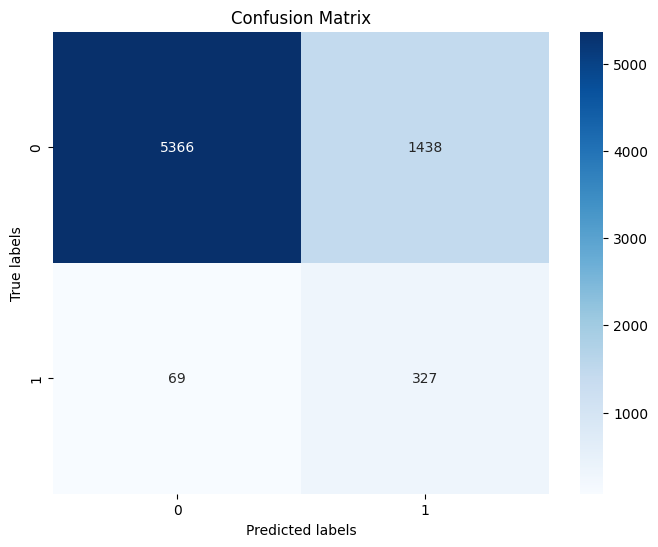

In [67]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

X_train =  training_data_randomly_balanced[['SAL_TA', 'ROE', 'ROA_NETTO', 'TL_TA', 'CASH_TA', 'ROS', 'NCL_TA', 'TL_SAL', 'LABOR_PRODUCTIVITY', 'SOCLIAB_SAL']].values
y_train =  training_data_randomly_balanced['RUZ_indirect_criterion_2y_off'].values



logistic_model = LogisticRegression(max_iter=5000)

logistic_model.fit(X_train, y_train)


scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'balanced_accuracy']



X_test =  testing_data_randomly_balanced[['SAL_TA', 'ROE', 'ROA_NETTO', 'TL_TA', 'CASH_TA', 'ROS', 'NCL_TA', 'TL_SAL', 'LABOR_PRODUCTIVITY', 'SOCLIAB_SAL']].values
y_test =  testing_data_randomly_balanced['RUZ_indirect_criterion_2y_off'].values


cv_results = cross_validate(logistic_model, X_test, y_test, cv=5, scoring=scoring)


summary = [[np.mean(cv_results['test_accuracy']),
        np.mean(cv_results['test_precision']),
        np.mean(cv_results['test_recall']),
        np.mean(cv_results['test_f1']),
        np.mean(cv_results['test_roc_auc']),
        np.mean(cv_results['test_balanced_accuracy'])]]

print('testing')
display(pd.DataFrame(summary, columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score', 'Balanced Accuracy']))

cm = confusion_matrix(y_test, logistic_model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Data distribution

In [ ]:
def plot_histograms(df, columns, filter_out_outliers = True):
    # Plotting the histograms
    fig, axes = plt.subplots(nrows=int(len(columns) / 3) + 1, ncols=3, figsize=(20, 30))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        ax = axes[i]


        data = df.query(f'{column} == {column}')[column]
        
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if filter_out_outliers:
            cleaned_data = data[~((data < lower_bound) | (data > upper_bound))]
        else:
            cleaned_data = data

        bin_width = 2 * IQR / (len(cleaned_data) ** (1/3))

        num_bins = int(np.ceil((np.max(cleaned_data) - np.min(cleaned_data)) / bin_width))

        sns.histplot(cleaned_data, bins=num_bins, kde=True, color='skyblue', edgecolor='black', ax=ax)
        # sns.kdeplot(cleaned_data, color='red', ax=ax, linewidth=2)  # Adding KDE plot
        ax.set_title(column)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    # Hide empty subplots
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [ ]:
# plot_histograms(financial_ratios_table.query('year == 2018'), predictors)
plot_histograms(data_2018.query('is_outlier == 0'), predictors)

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = financial_ratios_table_2017.query('is_outlier == False')[predictors].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation Matrix - {sal_class}')
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm

def calculate_vif(data):
    # Add a constant term to the independent variables matrix
    X = sm.add_constant(data)

    # Compute VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [1 / (1 - sm.OLS(X[col], X.drop(columns=[col])).fit().rsquared) for col in X.columns]
    vif_data['VIF'] = vif_data['VIF'].apply(lambda x: round(x, 2))

    return vif_data



vif_result = calculate_vif(pd.DataFrame(fill_missing_values_mean(financial_ratios_table_2017[predictors]), columns=predictors))
display(vif_result)

vif_result = calculate_vif(pd.DataFrame(fill_missing_values_mean(financial_ratios_table_2017[['SAL_TA', 'ROE', 'ROA_NETTO', 'TL_TA', 'CASH_TA', 'ROS', 'NCL_TA', 'TL_SAL', 'LABOR_PRODUCTIVITY', 'SOCLIAB_SAL']]), columns=['SAL_TA', 'ROE', 'ROA_NETTO', 'TL_TA', 'CASH_TA', 'ROS', 'NCL_TA', 'TL_SAL', 'LABOR_PRODUCTIVITY', 'SOCLIAB_SAL']))
display(vif_result)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = financial_ratios_table_2017.query('is_outlier == False')[['SAL_TA', 'ROE', 'ROA_NETTO', 'TL_TA', 'CASH_TA', 'ROS', 'NCL_TA', 'TL_SAL', 'LABOR_PRODUCTIVITY', 'SOCLIAB_SAL']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation Matrix')
plt.show()

## Models

### Logistic Regression

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Generating some sample data with imbalanced classes

# X =  fill_missing_values_mean(financial_ratios_table_2017.query('is_outlier == False')[['SAL_TA', 'ROE', 'ROA_NETTO', 'TL_TA', 'CASH_TA', 'ROS', 'NCL_TA', 'TL_SAL', 'LABOR_PRODUCTIVITY', 'SOCLIAB_SAL']].values)
# y =  financial_ratios_table_2017.query('is_outlier == False')['direct_criterion_2y_off'].fillna(1).values

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train =  fill_missing_values_mean(financial_ratios_table_2017.query('is_outlier == False')[['SAL_TA', 'ROE', 'ROA_NETTO', 'TL_TA', 'CASH_TA', 'ROS', 'NCL_TA', 'TL_SAL', 'LABOR_PRODUCTIVITY', 'SOCLIAB_SAL']].values)
y_train =  financial_ratios_table_2017.query('is_outlier == False')['direct_criterion_2y_off'].fillna(1).values

X_test =  fill_missing_values_mean(financial_ratios_table_2018.query('is_outlier == False')[['SAL_TA', 'ROE', 'ROA_NETTO', 'TL_TA', 'CASH_TA', 'ROS', 'NCL_TA', 'TL_SAL', 'LABOR_PRODUCTIVITY', 'SOCLIAB_SAL']].values)
y_test =  financial_ratios_table_2018.query('is_outlier == False')['direct_criterion_2y_off'].fillna(1).values

# Creating SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy='auto', random_state=42)
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Creating logistic regression model
logistic_model = LogisticRegression()

# Creating a pipeline to combine sampling and modeling
pipeline = Pipeline([('SMOTE', smote), ('RUS', rus), ('Logistic Regression', logistic_model)])

# Fitting the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predicting on the testing set
y_pred = pipeline.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print all evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Balanced Accuracy:", balanced_accuracy)

# Generating and plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# Creating Decision Tree classifier
tree_model = DecisionTreeClassifier(criterion="gini")

# Creating a pipeline to combine sampling and modeling
pipeline = Pipeline([('SMOTE', smote), ('RUS', rus), ('Decision Tree', tree_model)])

# Fitting the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predicting on the testing set
y_pred = pipeline.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print all evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Balanced Accuracy:", balanced_accuracy)

# Generating and plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Support Vector Machine

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline



# Creating SVM classifier
svm_model = SVC(kernel='linear')  # You can choose different kernels such as 'linear', 'rbf', 'poly', etc.

# Creating a pipeline to combine sampling and modeling
pipeline = Pipeline([('SMOTE', smote), ('RUS', rus), ('SVM', svm_model)])

# Fitting the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predicting on the testing set
y_pred = pipeline.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print all evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Balanced Accuracy:", balanced_accuracy)

# Generating and plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### Neural Net

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense


# Reshape y_train to match the expected shape for Keras
y_train = y_train.reshape(-1, 1)


# Creating a neural network classifier
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Creating a pipeline to combine sampling and modeling
pipeline = Pipeline([('SMOTE', smote), ('RUS', rus)])

# Fitting the pipeline on the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Check the shape of X_train_resampled
print("Shape of X_train_resampled:", X_train_resampled.shape)

# Creating a neural network classifier
model = Sequential()
# Adjust the input shape based on the actual number of features in X_train_resampled
model.add(Dense(10, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the neural network on the resampled data
model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=10, verbose=0)

# Predicting on the testing set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)


# Print all evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Balanced Accuracy:", balanced_accuracy)

# Generating and plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()